In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import networkx as nx
import random

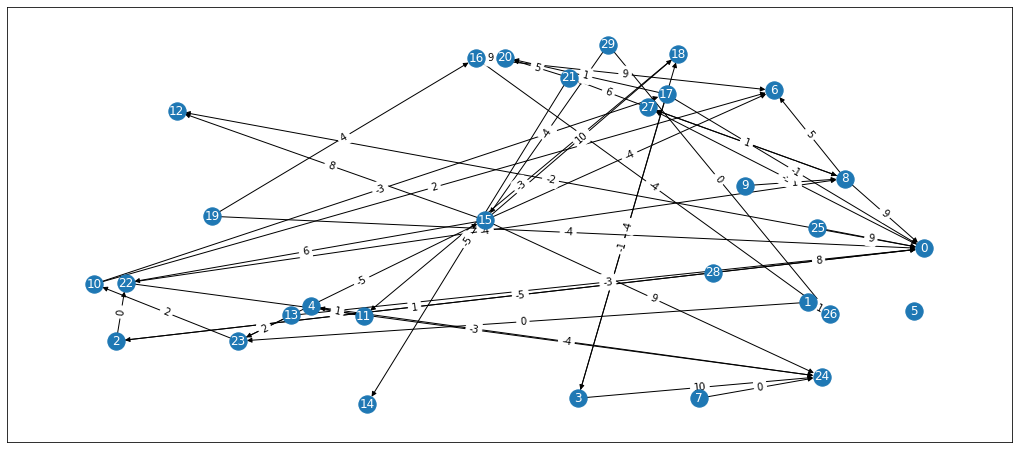

In [104]:
# Generate a random directed graph with pos/neg weights 

G = nx.erdos_renyi_graph(30, 0.05, directed=True)
for (u, v) in G.edges():
    G.edges[u,v]['weight'] = random.randint(-5,10)
pos = nx.spring_layout(G)
plt.figure(figsize=(18,8))
nx.draw_networkx(G, pos, with_labels=True, font_color='w')
_ = nx.draw_networkx_edge_labels(G, pos, edge_labels={(u,v):d['weight'] for u,v,d in G.edges(data=True)})

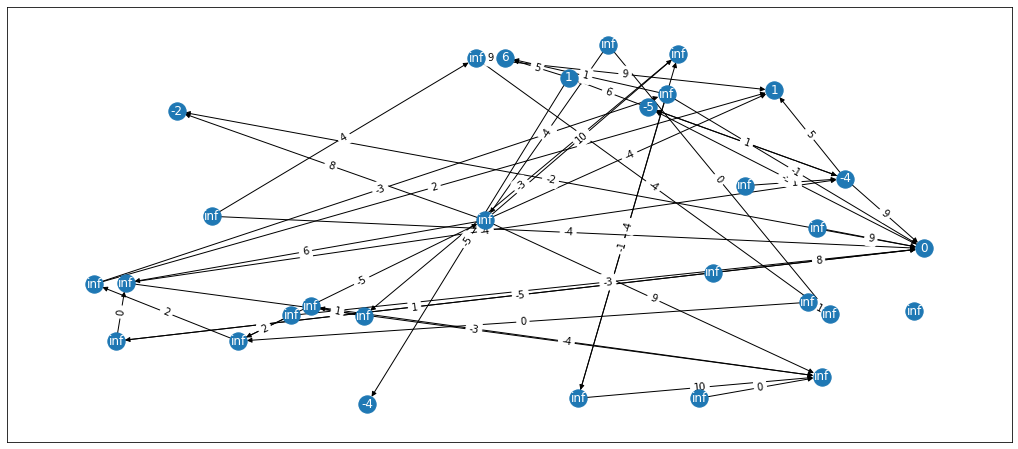

In [105]:
# Ground SCC truth shortest paths (from networkx library)
lengths = nx.shortest_path_length(G, 0, weight='weight')
print(G)
lengths = {n:lengths[n] if n in lengths else float('inf') for n in G}


plt.figure(figsize=(18,8))
nx.draw_networkx(G, pos, with_labels=True, font_color='w', labels = lengths)
_ = nx.draw_networkx_edge_labels(G, pos, edge_labels={(u,v):d['weight'] for u,v,d in G.edges(data=True)})

In [118]:
class memoize:
    def __init__(self, f):
        self.tbl = {}
        self.f = f
    def __call__(self, *args):
        if args in self.tbl:
            return self.tbl[args]
        self.tbl[args] = self.f(*args)
        return self.tbl[args]

# Bellman-Ford algorithm (implicit memoization)
def ShortestPathsBF(G):
    s = 0
    
    @memoize
    def Dist(u,i):
        if i == 0: return (0 if u == s else float('inf'))
        # Distance from s to u, in at most i hops
        best = Dist(u,i-1)
        for v,_,d in G.in_edges(u, data=True):
            bb = d['weight'] + Dist(v,i-1)
            if bb < best:
                best = bb
        return best
    
    paths = [Dist(u, G.order()) for u in G]
    return paths

d2 = ShortestPathsBF(G)

# Compare with ground truth
for u in G:
    assert d2[u] == lengths[u]